In [1]:
import sysplot as ssp
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

x = np.arange(10)
y = np.sin(x)

Failed to read module file 'C:\Users\Jax\Coding\sysplot\src\sysplot\plotting.py' for module 'sysplot.plotting': UnicodeDecodeError
Traceback (most recent call last):
  File "c:\Users\Jax\Coding\sysplot\.venv\Lib\site-packages\IPython\core\extensions.py", line 62, in load_extension
    return self._load_extension(module_str)
           ~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
  File "c:\Users\Jax\Coding\sysplot\.venv\Lib\site-packages\IPython\core\extensions.py", line 77, in _load_extension
    mod = import_module(module_str)
  File "C:\Users\Jax\AppData\Local\Python\pythoncore-3.14-64\Lib\importlib\__init__.py", line 88, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1398, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1371, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1335, in _find_and_load_unlocked
ModuleNotFoundError: 

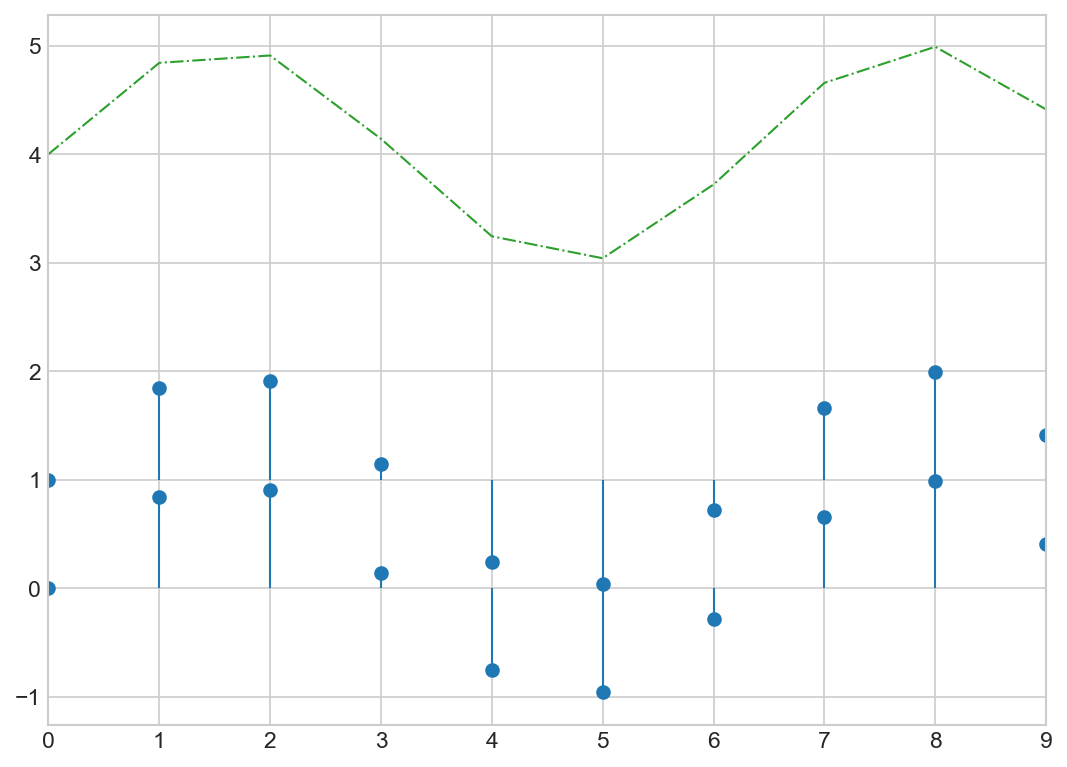

In [2]:
fig, ax = plt.subplots()
plt.stem(x, y, bottom=0, basefmt=" ")   # C0, expected c0
plt.stem(x, y+1, bottom=1, basefmt=" ") # C0, expected c0
plt.plot(x, y+4)                        # C2, expected c2

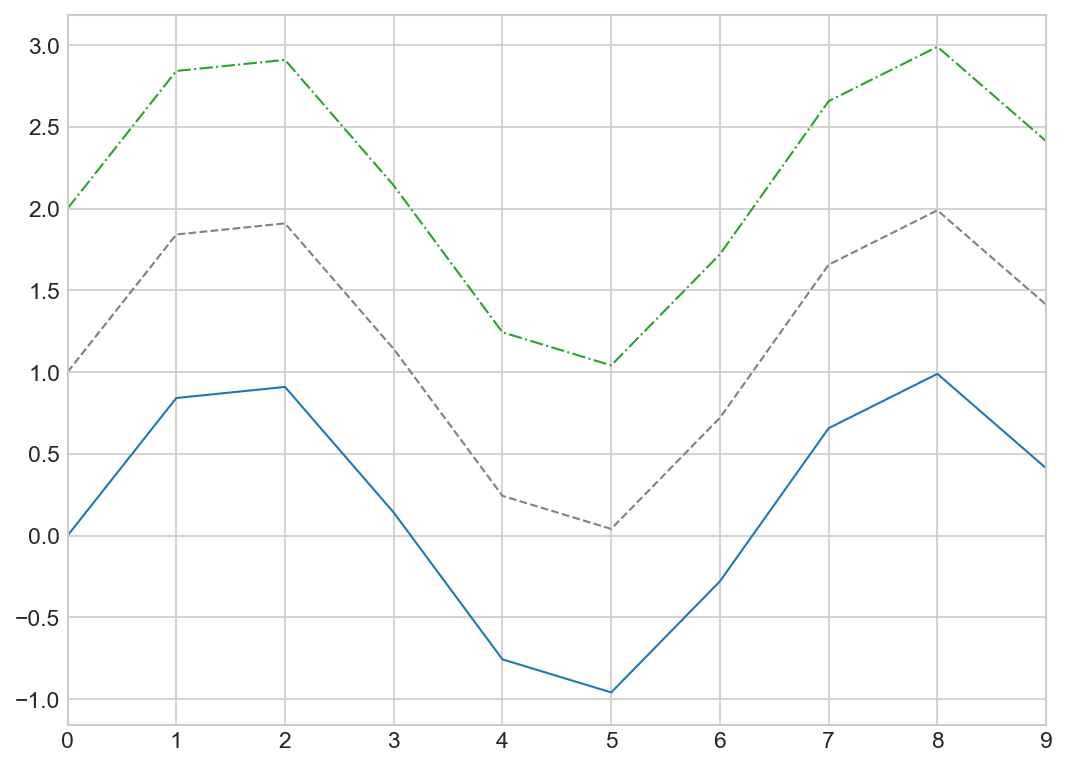

In [3]:
plt.plot(x, y)
plt.plot(x, y+1, color="gray")
plt.plot(x, y+2)
plt.show()

In [4]:
# style = next(ax._get_lines.prop_cycler)
# # AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

# style = next(ax._prop_cycle)
# # AttributeError: 'Axes' object has no attribute '_prop_cycle'

# style = next(ax._get_lines._cycler)
# # AttributeError: '_process_plot_var_args' object has no attribute '_cycler'

# style = next(iter(ax._get_lines.prop_cycler))
# # AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

# props = next(ax._get_lines)
# # TypeError: '_process_plot_var_args' object is not an iterator

# style = ax._get_lines.get_next_color()
# style # '#9467bd' this works!

# style = next(ax.get_prop_cycle())
# # AttributeError: 'Axes' object has no attribute 'get_prop_cycle'

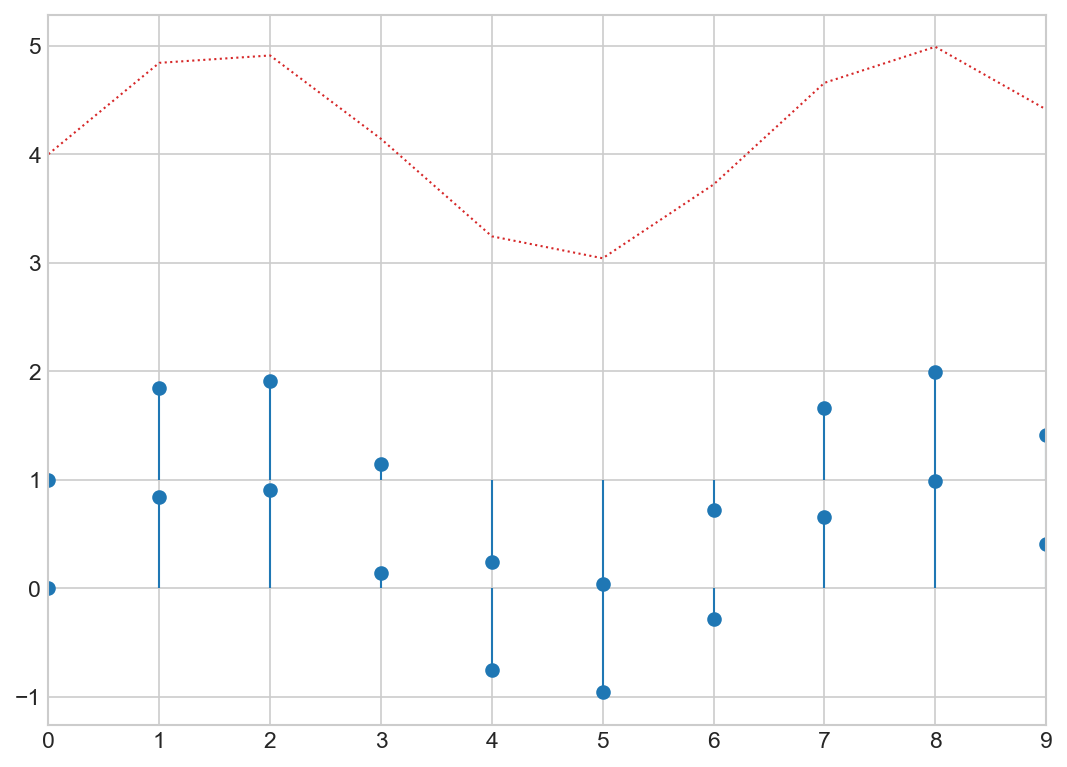

In [5]:
fig, ax = plt.subplots()
plt.stem(x, y, bottom=0, basefmt=" ", linefmt="")   # C0, expected c0
plt.stem(x, y+1, bottom=1, basefmt=" ") # C0, expected c0
plt.plot(x, y+4)                        # C3, expected c2

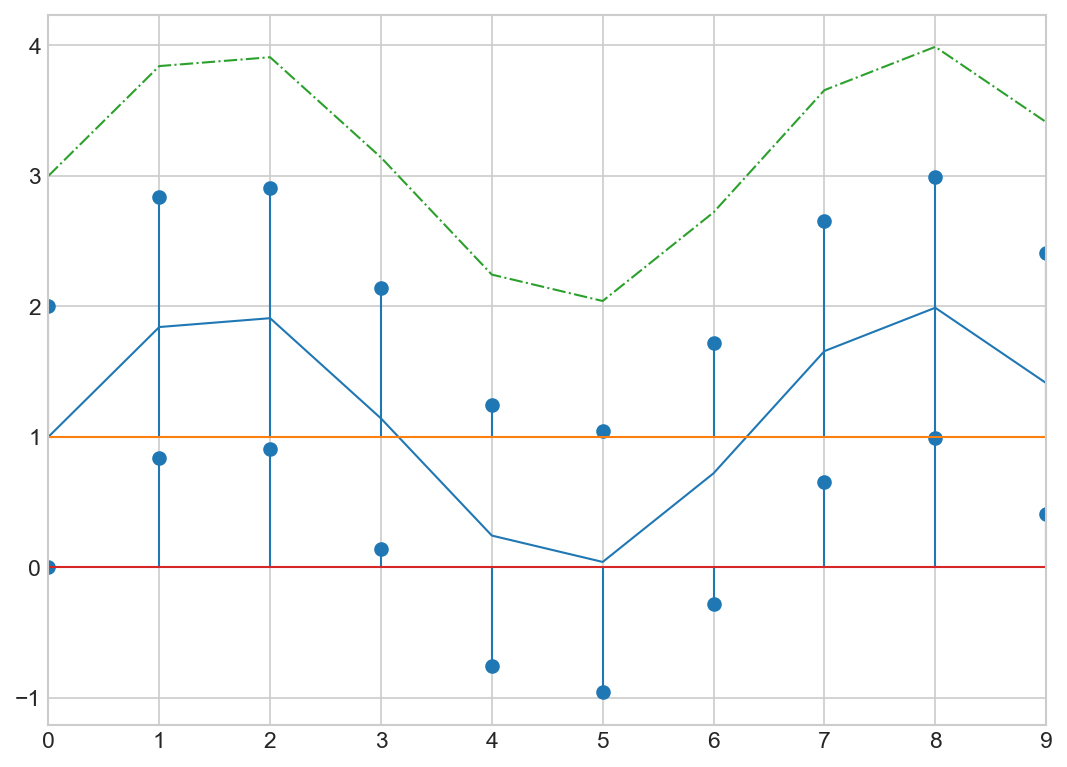

In [6]:
plt.stem(x, y)
plt.plot(x, y+1)
plt.stem(x, y+2, basefmt="", bottom=1)
plt.plot(x, y+3)

In [7]:
import matplotlib as mpl
from cycler import cycler

from typing import TypedDict
from typing import cast, Union, Tuple


ColorTypeHint = Union[
    str,
    Tuple[float, float, float],
    Tuple[float, float, float, float]
]

class PlotStyle(TypedDict):
    color: ColorTypeHint
    linestyle: Union[str, tuple[int, ...]]

# TODO: implement default color palette?
# TODO implement default gray filled area with transparency?

# Global style configuration
_DEFAULT_COLORS = mpl.rcParamsDefault['axes.prop_cycle'].by_key()['color']
"""list[str]: Color palette extracted from current Matplotlib color cycle."""

LINE_STYLES = [
    '-',                    # solid
    '--',                   # dashed
    '-.',                   # dash-dot
    ':',                    # dotted
    (0, (3, 1, 1, 1)),     # densely dashdotted
    (0, (5, 5)),           # dashed
    (0, (1, 1)),           # densely dotted
    (0, (5, 1)),           # densely dashed
    (0, (3, 5, 1, 5)),     # dashdotted
    (0, (1, 10)),          # loosely dotted
]
"""list: Line style patterns for plot cycling.

Each entry is either a string shorthand ('-', '--', etc.) or a tuple defining
custom dash patterns as (offset, (on, off, on, off, ...)).
"""

# Validate configuration
if len(_DEFAULT_COLORS) != len(LINE_STYLES):
    raise ValueError(f"Color palette length ({len(_DEFAULT_COLORS)}) does not match number of line styles ({len(LINE_STYLES)}).")

# Build and apply custom style cycler
_custom_cycler = cycler(color=_DEFAULT_COLORS) + cycler(linestyle=LINE_STYLES)
_styles = list(_custom_cycler)
mpl.rcParams['axes.prop_cycle'] = _custom_cycler

# Minimal flip table: only define one direction
_FLIPPED_MARKERS_BASE = {
    '^': 'v',  # up triangle → down triangle
    '>': '<',  # right triangle → left triangle
}

# Auto-generated full flip table (bidirectional mapping)
FLIPPED_MARKERS = {
    **_FLIPPED_MARKERS_BASE,
    **{v: k for k, v in _FLIPPED_MARKERS_BASE.items()}
}

In [8]:
_COLOR_TO_STYLE = {s["color"]: s for s in _styles}
# TODO: use this mapping for efficient lookup instead of iterating through the list each time

def _get_linestyle_for_color(color):
    style = _COLOR_TO_STYLE.get(color)
    if style is not None:
        return style["linestyle"]
    raise ValueError(f"Color {color} not found in custom cycler.")

_get_linestyle_for_color('#9467bd')

(0, (3, 1, 1, 1))

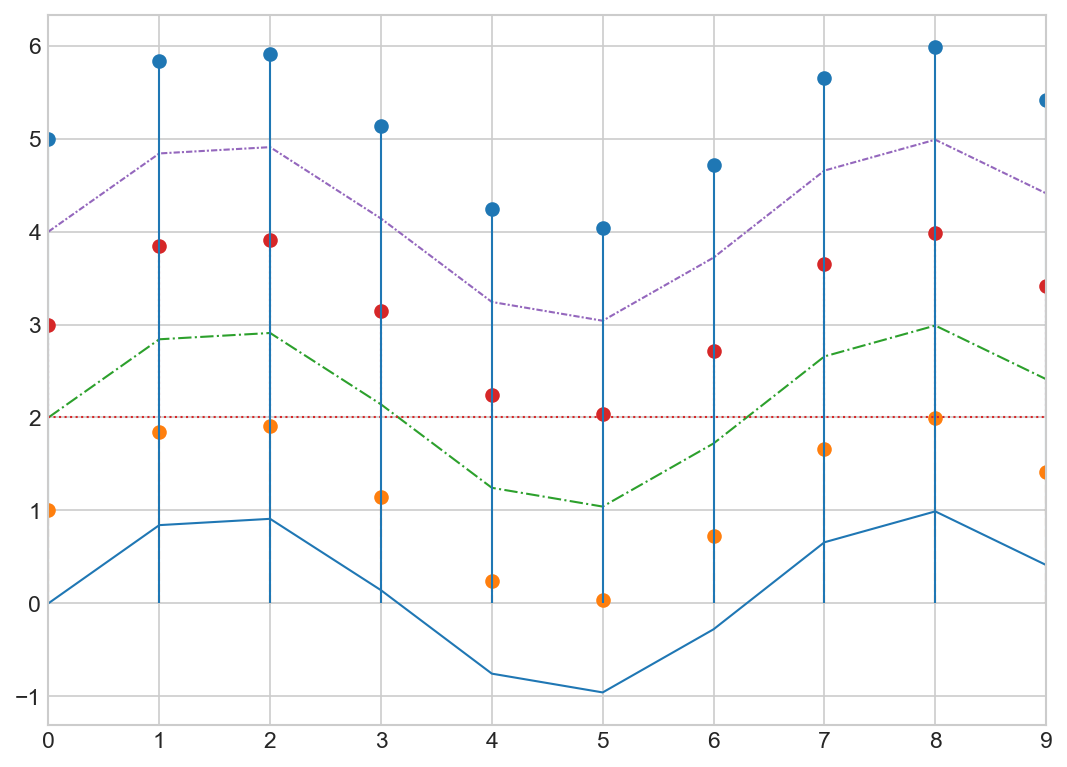

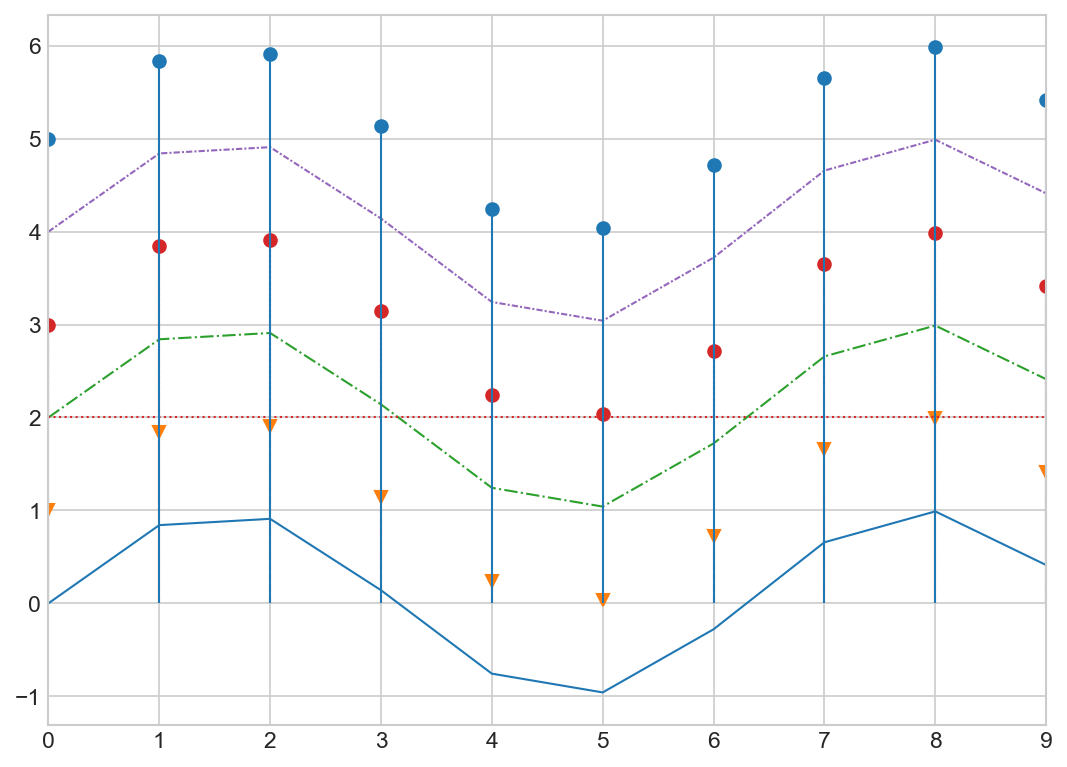

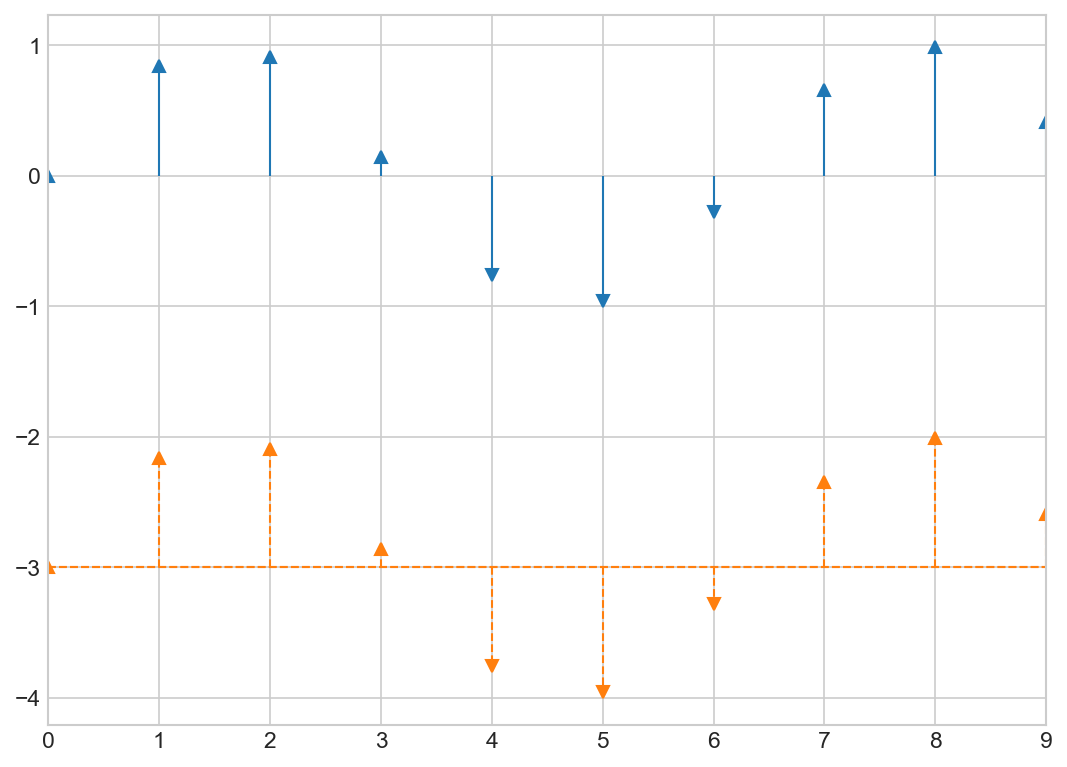

In [9]:
def plot_stem_test(x, y, ax=None, label=None, bottom=0, marker="o", markersize=6, show_baseline=False, style_index=None, markers_outwards=False):

    if ax is None:
        ax = plt.gca()

    if style_index is None:
        color = ax._get_lines.get_next_color()
        linestyle = _get_linestyle_for_color(color)
    else:
        style = _styles[style_index % len(_styles)]
        color = style["color"]
        linestyle = style["linestyle"]

    if markers_outwards:        
        up_stems = np.where(y >= bottom, y, np.nan)
    else:
        up_stems = y
        
    markerline, stemlines, baseline_line = ax.stem(x, up_stems, bottom=bottom, label=label)
    plt.setp(markerline, color=color, marker=marker, markersize=markersize)
    plt.setp(stemlines, color=color, linestyle=linestyle)
    if show_baseline:
        plt.setp(baseline_line, color=color, linestyle=linestyle)
    else:
        baseline_line.set_visible(False)

    if markers_outwards:
        down_stems = np.where(y < bottom, y, np.nan)
        flipped_marker = FLIPPED_MARKERS[marker]

        markerline, stemlines, baseline_line = ax.stem(x, down_stems, bottom=bottom)
        plt.setp(markerline, color=color, marker=flipped_marker, markersize=markersize)
        plt.setp(stemlines, color=color, linestyle=linestyle)
        if show_baseline:
            plt.setp(baseline_line, color=color, linestyle=linestyle)
        else:
            baseline_line.set_visible(False)
    



fig, ax = plt.subplots()
plt.plot(x, y)  # expected c0, got c0
plot_stem_test(x, y+1, ax=ax) # expected c1, got c1
plt.plot(x, y+2)  # expected c2, got c2
plot_stem_test(x, y+3, ax=ax, show_baseline=True, bottom=2) # expected c3, got c3
plt.plot(x, y+4)  # expected c4, got c4
plot_stem_test(x, y+5, ax=ax, style_index=0) # expected c0, got c0
plt.show()

fig, ax = plt.subplots()
plt.plot(x, y)  # expected c0, got c0
plot_stem_test(x, y+1, ax=ax, markers_outwards=True, marker="v") # expected c1 2 times, got c1 2 times
plt.plot(x, y+2)  # expected c2, got c2
plot_stem_test(x, y+3, ax=ax, show_baseline=True, bottom=2) # expected c3, got c3
plt.plot(x, y+4)  # expected c4, got c4
plot_stem_test(x, y+5, ax=ax, style_index=0) # expected c0, got c0
plt.show()

plot_stem_test(x, y, markers_outwards=True, marker="^")
plot_stem_test(x, y-3, markers_outwards=True, marker="^", show_baseline=True, bottom=-3)

<generator object _process_plot_var_args.__call__ at 0x00000222D1338AC0>

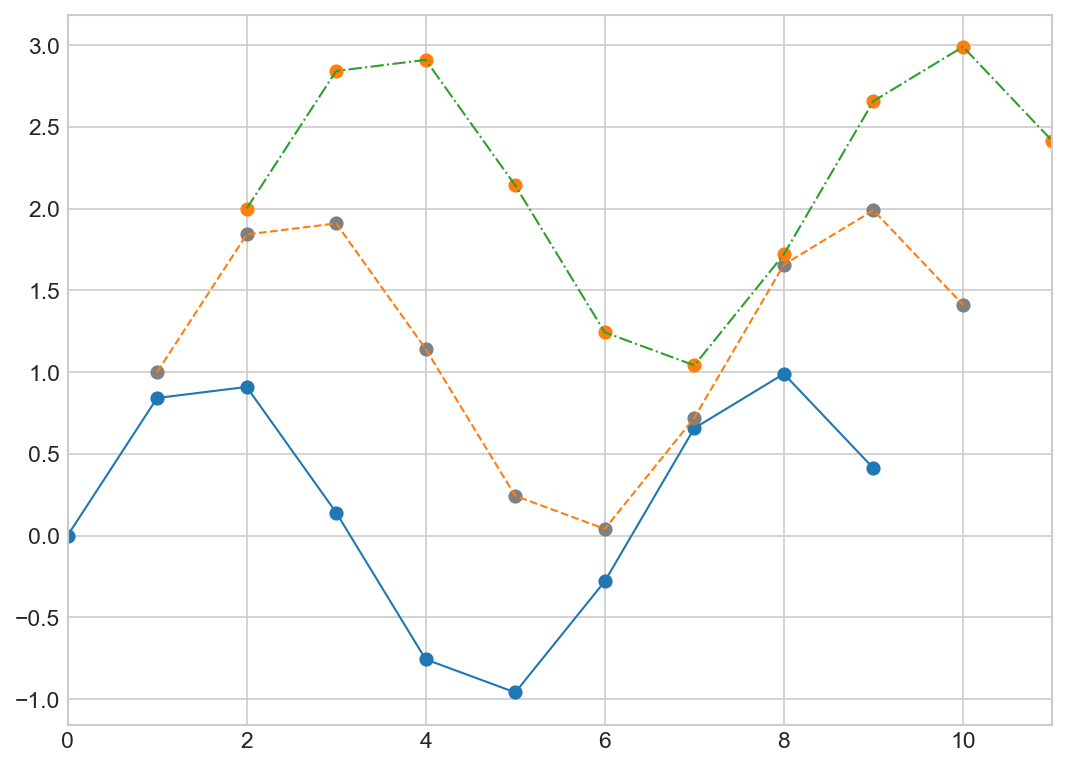

In [10]:
fig, ax = plt.subplots()

plt.plot(x, y)  #c0
plt.scatter(x, y)   #c0
plt.scatter(x+1, y+1, color="gray") #gray
plt.plot(x+1, y+1)  #c2
plt.scatter(x+2, y+2)   #c1
plt.plot(x+2, y+2)  #c3

ax._get_patches_for_fill(ax)

# plt.show()

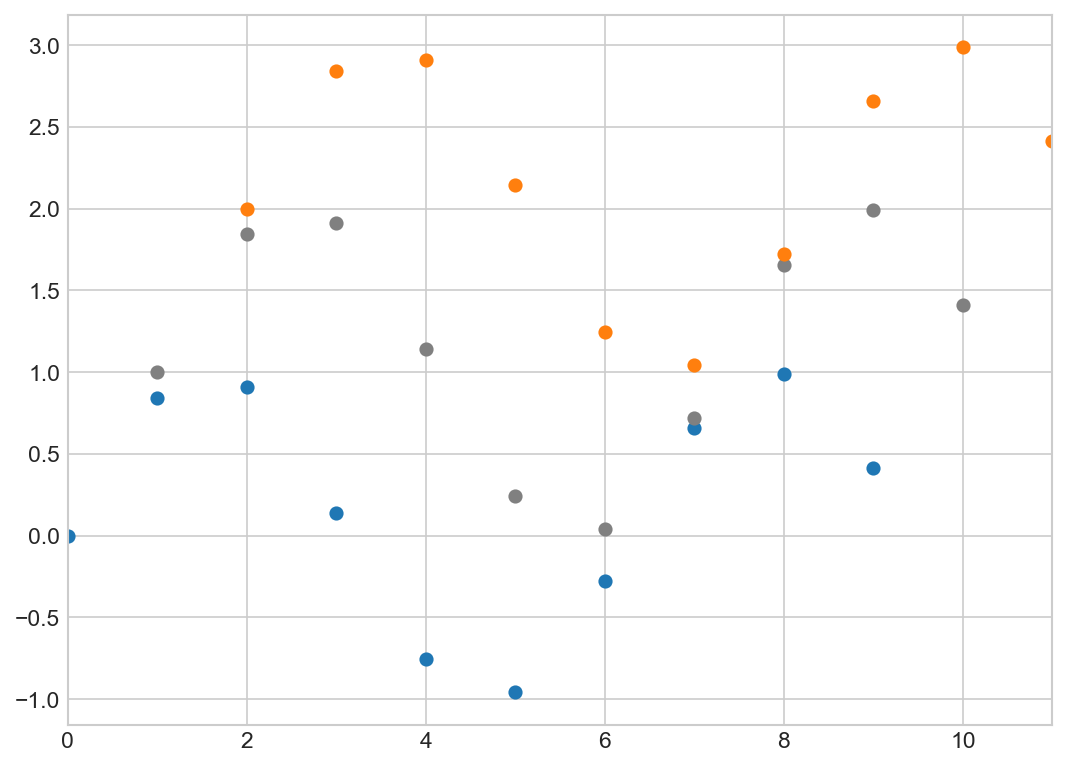

In [11]:
plt.scatter(x, y)   # expected c0, got c0
plt.scatter(x+1, y+1, color="gray") # expected gray, got gray
plt.scatter(x+2, y+2)   # expected c1, got c1

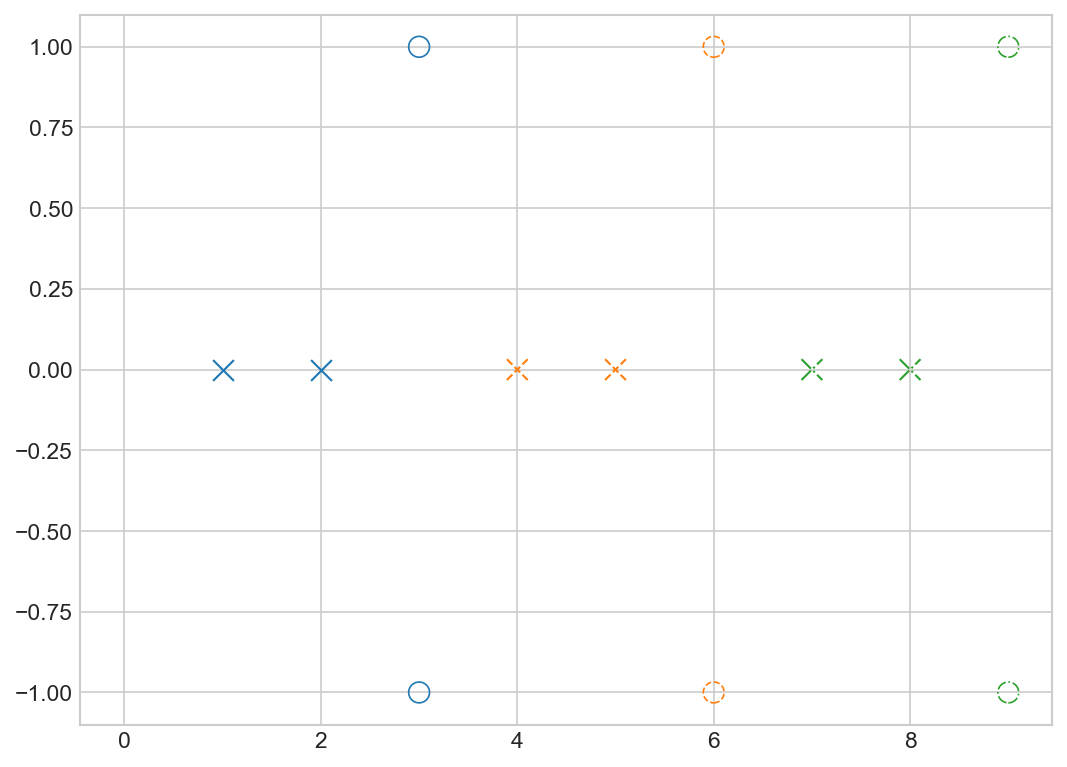

In [12]:
fig, ax = plt.subplots()

# plt.plot(x, y)
ssp.plot_poles_zeros([1, 2], [3+1j,3-1j], ax=ax)   #expected c0, got c0
ssp.plot_poles_zeros([4, 5], [6+1j,6-1j], ax=ax)   #expected c1, got c2
ssp.plot_poles_zeros([7, 8], [9+1j,9-1j], ax=ax)   #expected c2, got c4

plt.show()

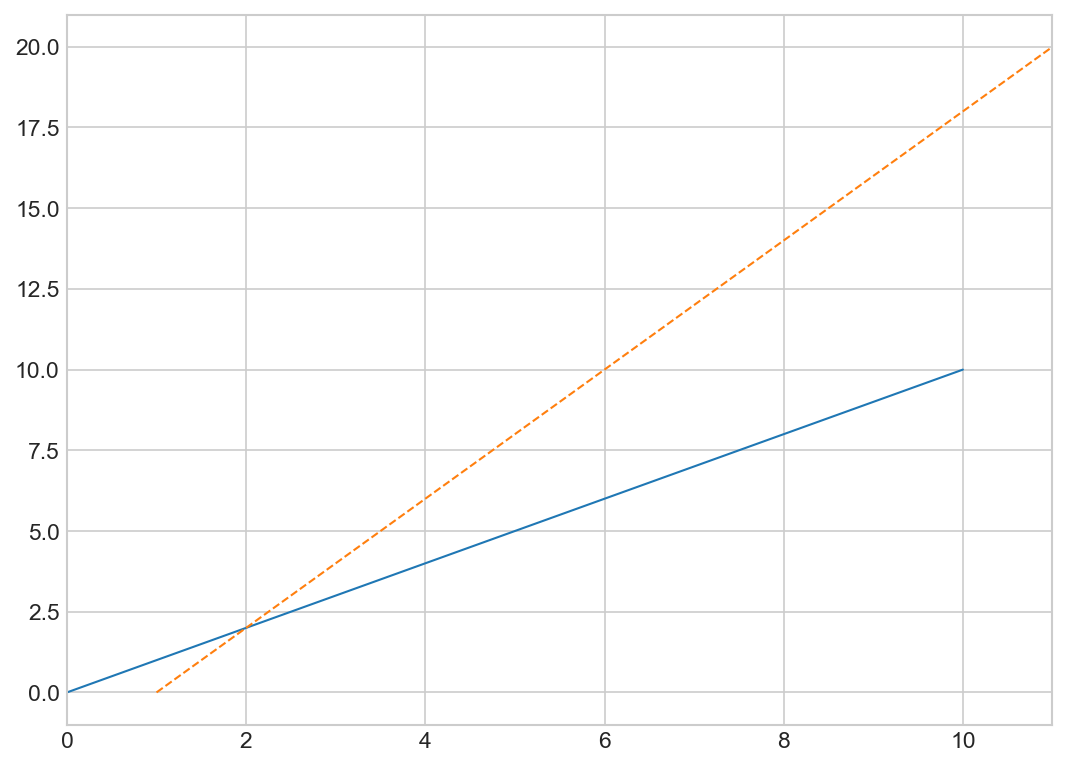

In [13]:
fig, ax = plt.subplots()

x = np.linspace(0, 10, 100)
y = x

line1, = plt.plot(x, y)  # expected c0, got c0
line2, = plt.plot(x+1, 2*y)  # expected c1, got

# arc = ssp.plot_arc(line1, line2, origin=(1,1))
# ax.add_patch(arc)

plt.show()

In [14]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Arc
from matplotlib.transforms import Bbox, IdentityTransform, TransformedBbox


class AngleAnnotation(Arc):
    """
    Draws an arc between two vectors which appears circular in display space.
    """
    def __init__(self, xy, p1, p2, size=75, unit="points", ax=None,
                 text="", textposition="inside", text_kw=None, **kwargs):
        """
        Parameters
        ----------
        xy, p1, p2 : tuple or array of two floats
            Center position and two points. Angle annotation is drawn between
            the two vectors connecting *p1* and *p2* with *xy*, respectively.
            Units are data coordinates.

        size : float
            Diameter of the angle annotation in units specified by *unit*.

        unit : str
            One of the following strings to specify the unit of *size*:

            * "pixels": pixels
            * "points": points, use points instead of pixels to not have a
              dependence on the DPI
            * "axes width", "axes height": relative units of Axes width, height
            * "axes min", "axes max": minimum or maximum of relative Axes
              width, height

        ax : `matplotlib.axes.Axes`
            The Axes to add the angle annotation to.

        text : str
            The text to mark the angle with.

        textposition : {"inside", "outside", "edge"}
            Whether to show the text in- or outside the arc. "edge" can be used
            for custom positions anchored at the arc's edge.

        text_kw : dict
            Dictionary of arguments passed to the Annotation.

        **kwargs
            Further parameters are passed to `matplotlib.patches.Arc`. Use this
            to specify, color, linewidth etc. of the arc.

        """
        self.ax = ax or plt.gca()
        self._xydata = xy  # in data coordinates
        self.vec1 = p1
        self.vec2 = p2
        self.size = size
        self.unit = unit
        self.textposition = textposition

        super().__init__(self._xydata, size, size, angle=0.0,
                         theta1=self.theta1, theta2=self.theta2, **kwargs)

        self.set_transform(IdentityTransform())
        self.ax.add_patch(self)

        self.kw = dict(ha="center", va="center",
                       xycoords=IdentityTransform(),
                       xytext=(0, 0), textcoords="offset points",
                       annotation_clip=True)
        self.kw.update(text_kw or {})
        self.text = ax.annotate(text, xy=self._center, **self.kw)

    def get_size(self):
        factor = 1.
        if self.unit == "points":
            factor = self.ax.figure.dpi / 72.
        elif self.unit[:4] == "axes":
            b = TransformedBbox(Bbox.unit(), self.ax.transAxes)
            dic = {"max": max(b.width, b.height),
                   "min": min(b.width, b.height),
                   "width": b.width, "height": b.height}
            factor = dic[self.unit[5:]]
        return self.size * factor

    def set_size(self, size):
        self.size = size

    def get_center_in_pixels(self):
        """return center in pixels"""
        return self.ax.transData.transform(self._xydata)

    def set_center(self, xy):
        """set center in data coordinates"""
        self._xydata = xy

    def get_theta(self, vec):
        vec_in_pixels = self.ax.transData.transform(vec) - self._center
        return np.rad2deg(np.arctan2(vec_in_pixels[1], vec_in_pixels[0]))

    def get_theta1(self):
        return self.get_theta(self.vec1)

    def get_theta2(self):
        return self.get_theta(self.vec2)

    def set_theta(self, angle):
        pass

    # Redefine attributes of the Arc to always give values in pixel space
    _center = property(get_center_in_pixels, set_center)
    theta1 = property(get_theta1, set_theta)
    theta2 = property(get_theta2, set_theta)
    width = property(get_size, set_size)
    height = property(get_size, set_size)

    # The following two methods are needed to update the text position.
    def draw(self, renderer):
        self.update_text()
        super().draw(renderer)

    def update_text(self):
        c = self._center
        s = self.get_size()
        angle_span = (self.theta2 - self.theta1) % 360
        angle = np.deg2rad(self.theta1 + angle_span / 2)
        r = s / 2
        if self.textposition == "inside":
            r = s / np.interp(angle_span, [60, 90, 135, 180],
                                          [3.3, 3.5, 3.8, 4])
        self.text.xy = c + r * np.array([np.cos(angle), np.sin(angle)])
        if self.textposition == "outside":
            def R90(a, r, w, h):
                if a < np.arctan(h/2/(r+w/2)):
                    return np.sqrt((r+w/2)**2 + (np.tan(a)*(r+w/2))**2)
                else:
                    c = np.sqrt((w/2)**2+(h/2)**2)
                    T = np.arcsin(c * np.cos(np.pi/2 - a + np.arcsin(h/2/c))/r)
                    xy = r * np.array([np.cos(a + T), np.sin(a + T)])
                    xy += np.array([w/2, h/2])
                    return np.sqrt(np.sum(xy**2))

            def R(a, r, w, h):
                aa = (a % (np.pi/4))*((a % (np.pi/2)) <= np.pi/4) + \
                     (np.pi/4 - (a % (np.pi/4)))*((a % (np.pi/2)) >= np.pi/4)
                return R90(aa, r, *[w, h][::int(np.sign(np.cos(2*a)))])

            bbox = self.text.get_window_extent()
            X = R(angle, r, bbox.width, bbox.height)
            trans = self.ax.figure.dpi_scale_trans.inverted()
            offs = trans.transform(((X-s/2), 0))[0] * 72
            self.text.set_position([offs*np.cos(angle), offs*np.sin(angle)])

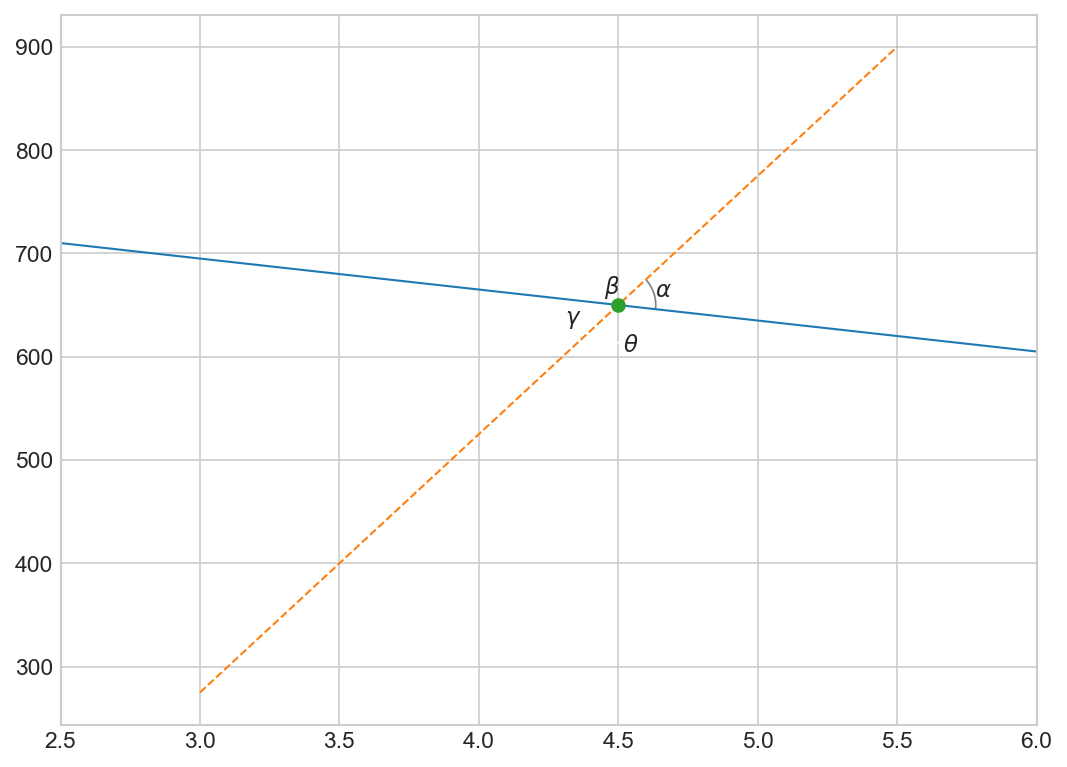

In [15]:
fig, ax = plt.subplots()

center = (4.5, 650)
p1 = [(2.5, 710), (6.0, 605)]
p2 = [(3.0, 275), (5.5, 900)]
line1, = ax.plot(*zip(*p1))
line2, = ax.plot(*zip(*p2))
point, = ax.plot(*center, marker="o")

am1 = AngleAnnotation(center, p1[1], p2[1], ax=ax, size=75, text=r"$\alpha$", color="gray", textposition="inside")
am2 = AngleAnnotation(center, p2[1], p1[0], ax=ax, size=35, text=r"$\beta$")
am3 = AngleAnnotation(center, p1[0], p2[0], ax=ax, size=75, text=r"$\gamma$")
am4 = AngleAnnotation(center, p2[0], p1[1], ax=ax, text=r"$\theta$")

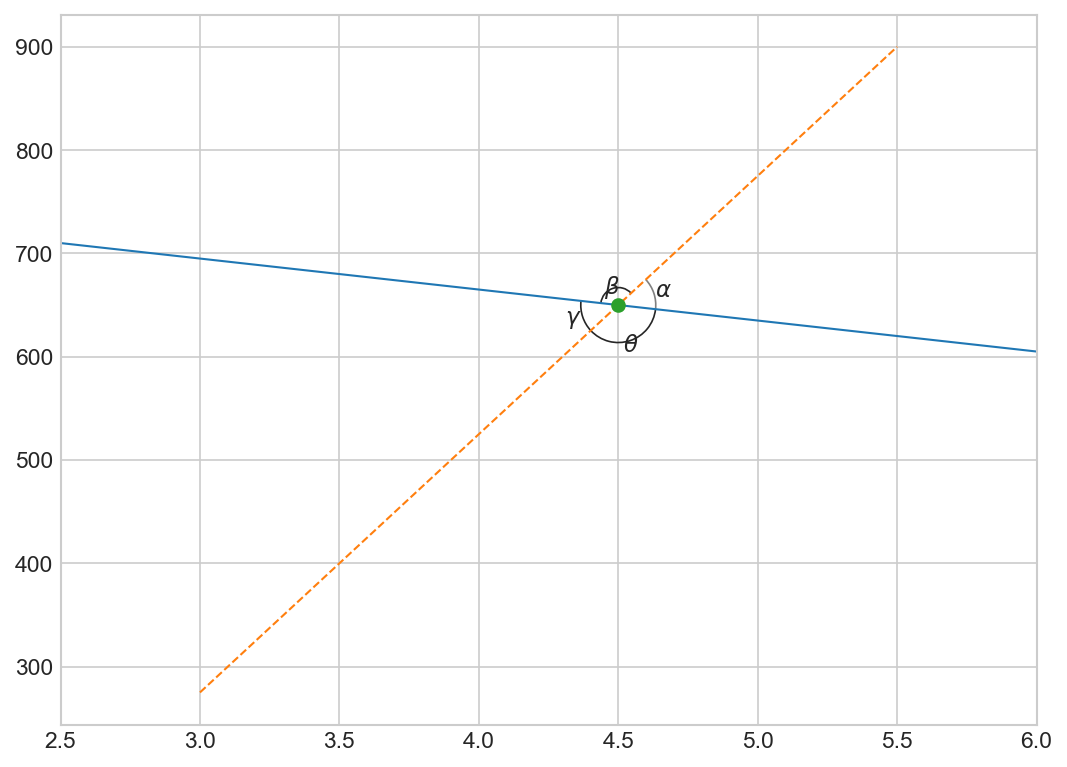

: 

In [ ]:
fig, ax = plt.subplots()

center = (4.5, 650)
p1 = [(2.5, 710), (6.0, 605)]
p2 = [(3.0, 275), (5.5, 900)]
line1, = ax.plot(*zip(*p1))
line2, = ax.plot(*zip(*p2))
point, = ax.plot(*center, marker="o")

am1 = ssp.plot_angle(center, p1[1], p2[1], ax=ax, size=75, text=r"$\alpha$", color="gray", textposition="inside")
am2 = ssp.plot_angle(center, p2[1], p1[0], ax=ax, size=35, text=r"$\beta$")
am3 = ssp.plot_angle(center, p1[0], p2[0], ax=ax, size=75, text=r"$\gamma$")
am4 = ssp.plot_angle(center, p2[0], p1[1], ax=ax, text=r"$\theta$")

plt.show()

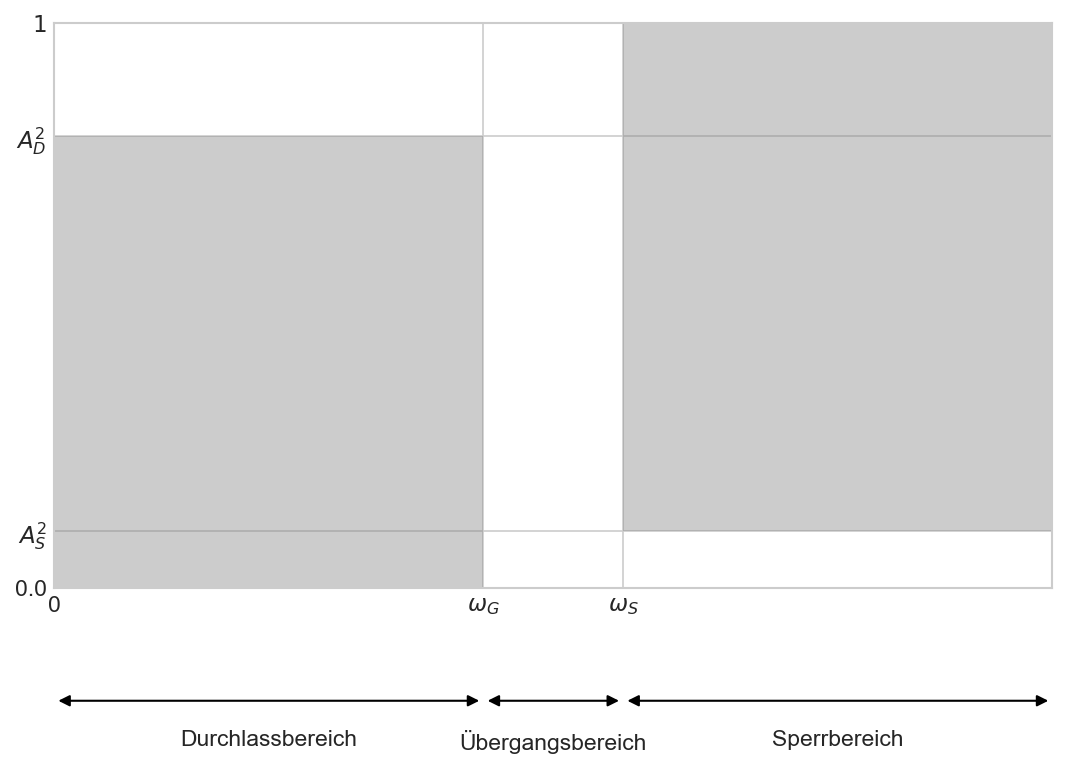

In [17]:
w = np.linspace(0, 3, 500)
T1 = 0.2
y = 0.85 * np.abs(1 / (1 + 1.4 * 1j * w * T1 - w**2 * T1**2 ) ) ** 200

Ad_squared = 0.8
As_squared = 0.1

idx_g = np.where(y <= 0.5)[0][0]
idx_s = np.where(y <= As_squared)[0][0]
wg = w[idx_g]
ws = w[idx_s]

bands = [
    {"type": "pass", "w0": 0, "w1": wg, "label": "Durchlassbereich", "w0_label": "0", "w1_label": r"$\omega_G$"},
    {"type": "transition", "w0": wg, "w1": ws, "label": "Übergangsbereich", "w0_label": r"$\omega_G$", "w1_label": r"$\omega_S$"},
    {"type": "stop", "w0": ws, "w1": wg+ws, "label": "Sperrbereich", "w0_label": r"$\omega_S$", "w1_label": None},
]

fig, ax = plt.subplots()

ssp.plot_filter_tolerance(ax, bands, A_pass=Ad_squared, A_stop=As_squared, w_max=wg+ws)

plt.show()

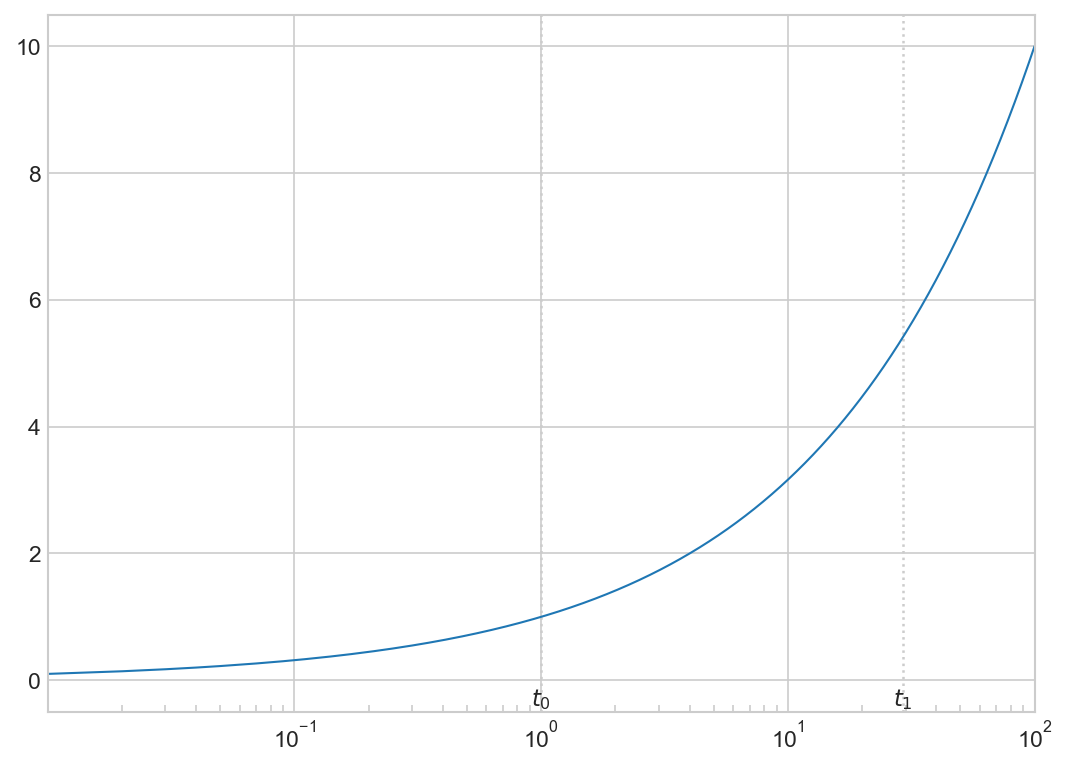

In [ ]:
fig, ax = plt.subplots()

x = np.linspace(0, 100, 10000)
y = np.power(x, 0.5)

plt.plot(x, y)
ax.set_xscale("log")

ssp.set_minor_log_ticks(ax.xaxis)

ssp.add_tick_line(axis=ax.xaxis, value=1, label=r"$t_0$")

ssp.add_tick_line(axis=ax.xaxis, value=29.3, label=r"$t_1$")

plt.show()

In [19]:
dir(ax._get_lines)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cycler_items',
 '_getdefaults',
 '_idx',
 '_make_coordinates',
 '_make_line',
 '_make_polygon',
 '_plot_args',
 '_setdefaults',
 'get_next_color',
 'output',
 'set_prop_cycle']

In [20]:
mpl.rcParams["xtick.direction"]

'in'